In [1]:
from app import *

Using cache from '/Users/dodijk/Library/CloudStorage/OneDrive-RTLNederlandB.V/code/videomatch/gradio_cached_examples/13' directory. If method or examples have changed since last caching, delete this folder to clear cache.


In [79]:
video_index = index_hashes_for_video(video_urls[0])
target_indices = [index_hashes_for_video(x) for x in video_urls[-1:]]
    
video_index.make_direct_map()
hash_vectors = np.array([video_index.reconstruct(i) for i in range(video_index.ntotal)])

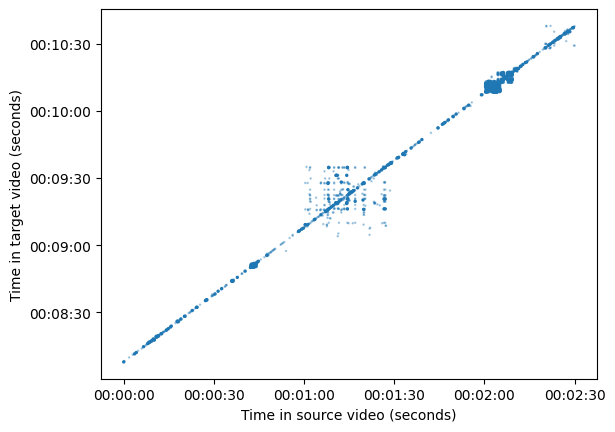

In [114]:
import time
import datetime

# The results are returned as a triplet of 1D arrays 
# lims, D, I, where result for query i is in I[lims[i]:lims[i+1]] 
# (indices of neighbors), D[lims[i]:lims[i+1]] (distances).
FPS = 5
MIN_DISTANCE = 3
lims, D, I = target_indices[0].range_search(hash_vectors, MIN_DISTANCE)

min_distances = [min(list(D[lims[i]:lims[i+1]]) or [np.nan]) for i in range(hash_vectors.shape[0])]
best_match = [min(list(I[lims[i]:lims[i+1]]) or [np.nan]) for i in range(hash_vectors.shape[0])]

x = [(lims[i+1]-lims[i]) * [i] for i in range(hash_vectors.shape[0])]
x = [datetime.datetime(1970, 1, 1, 0, 0) + datetime.timedelta(seconds=i/FPS) for j in x for i in j]

y = [datetime.datetime(1970, 1, 1, 0, 0) + datetime.timedelta(seconds=i/FPS) for i in I]

import matplotlib
import matplotlib.pyplot as plt

ax = plt.figure()
plt.scatter(x, y, s=2*(1-D/MIN_DISTANCE), alpha=1-D/MIN_DISTANCE)
plt.xlabel('Time in source video (seconds)')
plt.ylabel('Time in target video (seconds)')
plt.show()

In [105]:
datetime.fromtimestamp(0).replace(tzinfo=timezone.utc)

datetime.datetime(1970, 1, 1, 1, 0, tzinfo=datetime.timezone.utc)